Explained Variance Ratio of Components: [0.72962445 0.22850762]


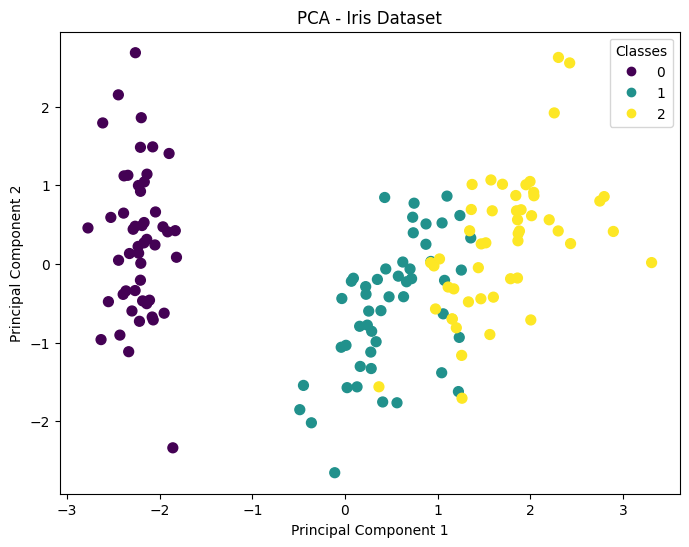

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_iris_data():
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    return df

def preprocess_data(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    return X_scaled

def apply_pca(X_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

def plot_pca(X_pca, target):
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=target, cmap='viridis', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA - Iris Dataset')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

if __name__ == "__main__":
    # Load data
    data = load_iris_data()
    target = load_iris().target

    # Preprocess (scale)
    X_scaled = preprocess_data(data)

    # Apply PCA
    X_pca, pca_model = apply_pca(X_scaled, n_components=2)

    # Explained variance ratio
    print("Explained Variance Ratio of Components:", pca_model.explained_variance_ratio_)

    # Plot PCA result
    plot_pca(X_pca, target)


In [ ]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("heart.csv")

# Step 3: Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Step 4: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ["cp", "thal", "slope"]
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(), categorical_features)
])

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Step 7: Train and Evaluate Models (Before PCA)
print("Accuracy Before PCA:")
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

from sklearn.decomposition import PCA

print("\nAccuracy After PCA (n_components=5):")
pca_results = {}

for name, model in models.items():
    pipeline_pca = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("pca", PCA(n_components=5)),
        ("classifier", model)
    ])
    pipeline_pca.fit(X_train, y_train)
    y_pred_pca = pipeline_pca.predict(X_test)
    acc_pca = accuracy_score(y_test, y_pred_pca)
    pca_results[name] = acc_pca
    print(f"{name}: {acc_pca:.4f}")


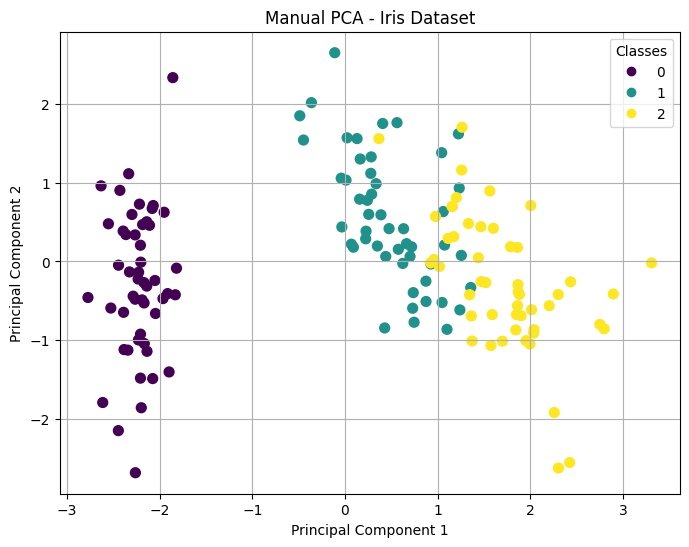

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and prepare data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select top 2 eigenvectors (2D PCA)
top_k = 2
principal_components = eigenvectors[:, :top_k]

# Step 6: Project the data
X_pca = X_scaled.dot(principal_components)

# Step 7: Plot the PCA result
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Manual PCA - Iris Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()



In [ ]:
| Dataset       | Function               | Description                          |
| ------------- | ---------------------- | ------------------------------------ |
| Iris          | `load_iris()`          | Flower dataset with 3 classes        |
| Digits        | `load_digits()`        | Handwritten digits (0–9), 8x8 images |
| Wine          | `load_wine()`          | Chemical analysis of wines           |
| Breast Cancer | `load_breast_cancer()` | Features from breast cancer biopsies |
| Diabetes      | `load_diabetes()`      | For regression (disease progression) |
| Linnerud      | `load_linnerud()`      | Exercise vs. physiological data      |


from sklearn.datasets import load_iris
data = load_iris()
print(data.DESCR)


In [ ]:


### ✅ **1. Linear & Multiple Linear Regression**

* **Dataset**: `load_diabetes()`
* **Why**: Classic regression dataset predicting disease progression based on 10 numerical features.

```python
from sklearn.datasets import load_diabetes
```

---

### ✅ **2. Logistic Regression**

* **Dataset**: `load_breast_cancer()`
* **Why**: Binary classification of malignant vs. benign tumors, well-suited for logistic regression.

```python
from sklearn.datasets import load_breast_cancer
```

---

### ✅ **3. K-Nearest Neighbors (KNN)**

* **Dataset**: `load_iris()`
* **Why**: Multiclass classification; small, balanced, and interpretable.

```python
from sklearn.datasets import load_iris
```

---

### ✅ **4. Support Vector Machine (SVM)**

* **Dataset**: `load_wine()`
* **Why**: Clear class separation with multiple numerical features.

```python
from sklearn.datasets import load_wine
```

---

### ✅ **5. Decision Tree (ID3)**

* **Dataset**: `load_iris()` or a small custom categorical dataset
* **Why**: Small, clean dataset ideal for manual tree logic and visualizations.

```python
from sklearn.datasets import load_iris
```

---

### ✅ **6. Random Forest**

* **Dataset**: `load_wine()` or `load_breast_cancer()`
* **Why**: High-dimensional, moderately sized datasets to show ensemble benefits.

```python
from sklearn.datasets import load_wine
```

---

### ✅ **7. Boosting (e.g., AdaBoost)**

* **Dataset**: `load_breast_cancer()`
* **Why**: Boosting improves weak learners like shallow decision trees; this dataset benefits from that.

```python
from sklearn.datasets import load_breast_cancer
```

---

### ✅ **8. K-Means Clustering**

* **Dataset**: `load_iris()` (unsupervised, ignore labels)
* **Why**: Obvious clusters exist in petal/sepal features; ideal for visualization.

```python
from sklearn.datasets import load_iris
```

---

### ✅ **9. Principal Component Analysis (PCA)**

* **Dataset**: `load_iris()`
* **Why**: Dimensionality reduction from 4D to 2D shows very clear PCA effect.

```python
from sklearn.datasets import load_iris
```

---

### 🧪 Synthetic Dataset Suggestions (optional)

* `make_classification()` → For classification models (logistic, SVM, decision trees)
* `make_regression()` → For linear/multi-linear regression
* `make_blobs()` → For clustering (K-Means)
* `make_moons()` or `make_circles()` → For non-linear decision boundaries (good for SVM)

